In [ ]:
import pandas as pd

loading the data

In [ ]:
df = pd.read_excel('data.xlsx')

looking and exploring the data

In [ ]:
df.head() # top 5 rows

In [ ]:
df.head(2) # top 2 rows

In [ ]:
df.tail() # bottom 5 rows

bottom 3 rows

In [ ]:
df.tail(3) 

named location, last index is included

In [ ]:
df.loc[10:15] 

indexed location, last index is not included

In [ ]:
df.iloc[10:15] 

column wise : data types and non-null values

In [ ]:
df.info() 

summary of data statistically - numerical columns

In [ ]:
df.describe()

summary of data statistically - textual columns

In [ ]:
df.describe(include='object')

single column selection - series selection - `dictionary like`

In [ ]:
df['Position'] # works every time

single column selection - dataframe selection - `dot notation`

In [ ]:
df.Position # but if there are spaces in the column name, this won't work

get column names

In [ ]:
df.columns # or df.columns.tolist()

multiple column selection - dataframe selection - `list of columns`

`dataframe`[[`column1`, `column2`, `columnN`]]

In [ ]:
df[['Position','Player Name ']] # dataframe

In [ ]:
df[[ 'Player Name ','Goals Scored ','Nationality ']] # dataframe

fixing the column names

In [ ]:
list(map(lambda col: col.strip().lower(), df.columns)) # test run

In [ ]:
df.columns = list(map(lambda col: col.strip().lower(),
                       df.columns)) # strip

In [ ]:
df.columns

replace function to fix column data

In [ ]:
df['goals scored'] = df['goals scored'].replace('-', 0)

`value_counts()` - frequency of unique values in a column

In [ ]:
df['goals scored'].value_counts()

In [ ]:
import numpy as np

df['goals scored'] = df['goals scored'].replace('N.A', np.nan)
df['goals scored'] = df['goals scored'].replace('N,A', np.nan)

In [ ]:
df['goals scored'].value_counts()

In [ ]:
df['goals scored'].value_counts().plot(
    kind='bar',
    title='Goals Scored'
)

In [ ]:
df.columns

In [ ]:
df['goals scored']

In [ ]:
df=df.sort_values(by='goals scored', ascending=False)

In [ ]:
x = [1,2,3]
y = [12,45,56]
for i,v in zip(x,y):
    print(i, v)

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 5))
bars = plt.bar(x='player name', height='goals scored',
        color='orange',
        hatch = '//',
        edgecolor='white',
        width=0.5,
        data=df.head(10))
# name of country on each bar
for bar,nation in zip(bars,df.head(10).nationality):
    yval = bar.get_height()
    plt.text(x = bar.get_x(),
             y = yval+.1, 
             s=nation,
             fontdict={'size':6},
        )
plt.xticks(rotation=45)
plt.title('Top 10 Goal Scorers in 2022')
plt.show()

In [ ]:
df.head(15)[::-1].plot(kind='barh', x='player name', 
                y='goals scored')

In [ ]:
# goals scores and assists
df.head(10)[::-1].plot(kind='barh', x='player name',
                y=['goals scored','assists provided'],
                stacked=True)


In [ ]:
# clubs with most players
df['club'].value_counts().head(10).plot(kind='pie',
                                        color='orange',
                                        autopct='%.1f%%',
                                        startangle=90,)

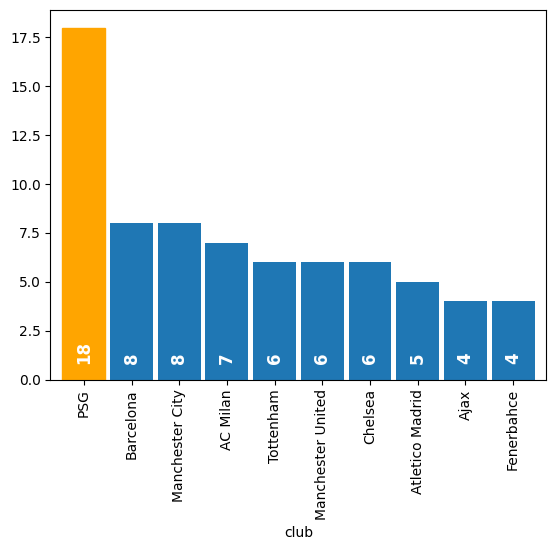

In [164]:
# clubs with most goals
bars= df.groupby('club')['goals scored'].sum().sort_values(
    ascending=False).head(10).plot(kind='bar', width=.9)
# highlight the 1st place
bars.patches[0].set_color('orange')
# goals scored on each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width()/2,
            y = 1, 
            s=f"{int(yval)}",
            ha='center',
            fontdict={'size':12, 'color':'white', 
                       'weight':'bold'},
            rotation=90,
        )

'_nolegend_'